In [8]:
import numpy as np
import pandas as pd 
from  sklearn.preprocessing  import LabelEncoder 
import warnings 
import matplotlib.pyplot as plt
%matplotlib inline 
warnings.filterwarnings('ignore')

In [9]:
train  =pd.read_csv( 'train_lightgbm.csv' )
test   =pd.read_csv( 'test_lightgbm.csv')

In [10]:
test.drop('label' ,axis =1 ,inplace =True )

In [11]:
for feature in train.columns:
    lbe = LabelEncoder()
    train[feature] = lbe.fit_transform(train[feature])
    

In [12]:
for feature in test.columns:
    lbe = LabelEncoder()
    test[feature] = lbe.fit_transform(test[feature])

In [13]:
from  sklearn.model_selection import train_test_split 
X= train.drop('label' ,axis =1 )
y= train['label']
x_train ,x_valid, y_train, y_valid = train_test_split(X ,y ,test_size = 0.2 ,
                                                      random_state =17 )

In [14]:
import lightgbm as lgb

param = {'boosting_type':'gbdt',
         'objective' : 'binary', #
         'metric' : 'binary_logloss',
         'learning_rate' : 0.01,
         'max_depth' : 15,
         'feature_fraction':0.8,
         'bagging_fraction': 0.9,
         'bagging_freq': 8,
         'lambda_l1': 0.6,
         'lambda_l2': 0,
        }
train_data = lgb.Dataset(x_train, label=y_train)
valid_data = lgb.Dataset(x_valid, label=y_valid)

evals_result ={}
model = lgb.train(param,train_data,
                  valid_sets=[train_data,valid_data],
                  num_boost_round = 10000 ,
                  early_stopping_rounds=500,
                  evals_result=evals_result , 
                  verbose_eval=25)


Training until validation scores don't improve for 500 rounds
[25]	training's binary_logloss: 0.597974	valid_1's binary_logloss: 0.598165
[50]	training's binary_logloss: 0.534091	valid_1's binary_logloss: 0.53428
[75]	training's binary_logloss: 0.489924	valid_1's binary_logloss: 0.490083
[100]	training's binary_logloss: 0.458156	valid_1's binary_logloss: 0.458302
[125]	training's binary_logloss: 0.434536	valid_1's binary_logloss: 0.434637
[150]	training's binary_logloss: 0.417358	valid_1's binary_logloss: 0.417427
[175]	training's binary_logloss: 0.404398	valid_1's binary_logloss: 0.404415
[200]	training's binary_logloss: 0.394606	valid_1's binary_logloss: 0.394615
[225]	training's binary_logloss: 0.386995	valid_1's binary_logloss: 0.387016
[250]	training's binary_logloss: 0.381195	valid_1's binary_logloss: 0.381229
[275]	training's binary_logloss: 0.376669	valid_1's binary_logloss: 0.376718
[300]	training's binary_logloss: 0.373214	valid_1's binary_logloss: 0.373267
[325]	training's b

[2675]	training's binary_logloss: 0.337441	valid_1's binary_logloss: 0.344652
[2700]	training's binary_logloss: 0.337332	valid_1's binary_logloss: 0.344632
[2725]	training's binary_logloss: 0.33723	valid_1's binary_logloss: 0.344624
[2750]	training's binary_logloss: 0.337126	valid_1's binary_logloss: 0.344612
[2775]	training's binary_logloss: 0.337024	valid_1's binary_logloss: 0.344604
[2800]	training's binary_logloss: 0.336921	valid_1's binary_logloss: 0.344593
[2825]	training's binary_logloss: 0.336809	valid_1's binary_logloss: 0.344584
[2850]	training's binary_logloss: 0.336702	valid_1's binary_logloss: 0.344569
[2875]	training's binary_logloss: 0.336577	valid_1's binary_logloss: 0.344531
[2900]	training's binary_logloss: 0.336474	valid_1's binary_logloss: 0.344534
[2925]	training's binary_logloss: 0.336372	valid_1's binary_logloss: 0.344522
[2950]	training's binary_logloss: 0.336254	valid_1's binary_logloss: 0.344493
[2975]	training's binary_logloss: 0.336141	valid_1's binary_loglo

[5325]	training's binary_logloss: 0.326839	valid_1's binary_logloss: 0.343348
[5350]	training's binary_logloss: 0.326745	valid_1's binary_logloss: 0.343333
[5375]	training's binary_logloss: 0.326636	valid_1's binary_logloss: 0.343308
[5400]	training's binary_logloss: 0.326542	valid_1's binary_logloss: 0.34331
[5425]	training's binary_logloss: 0.326456	valid_1's binary_logloss: 0.343321
[5450]	training's binary_logloss: 0.326368	valid_1's binary_logloss: 0.343317
[5475]	training's binary_logloss: 0.326272	valid_1's binary_logloss: 0.343301
[5500]	training's binary_logloss: 0.326194	valid_1's binary_logloss: 0.343307
[5525]	training's binary_logloss: 0.326104	valid_1's binary_logloss: 0.343307
[5550]	training's binary_logloss: 0.326032	valid_1's binary_logloss: 0.343312
[5575]	training's binary_logloss: 0.325952	valid_1's binary_logloss: 0.343307
[5600]	training's binary_logloss: 0.325868	valid_1's binary_logloss: 0.343304
[5625]	training's binary_logloss: 0.325768	valid_1's binary_loglo

[7975]	training's binary_logloss: 0.317823	valid_1's binary_logloss: 0.343019
[8000]	training's binary_logloss: 0.317746	valid_1's binary_logloss: 0.343017
[8025]	training's binary_logloss: 0.317668	valid_1's binary_logloss: 0.343019
[8050]	training's binary_logloss: 0.317598	valid_1's binary_logloss: 0.343017
[8075]	training's binary_logloss: 0.317512	valid_1's binary_logloss: 0.343015
[8100]	training's binary_logloss: 0.317424	valid_1's binary_logloss: 0.343007
[8125]	training's binary_logloss: 0.317338	valid_1's binary_logloss: 0.343011
[8150]	training's binary_logloss: 0.317259	valid_1's binary_logloss: 0.343017
[8175]	training's binary_logloss: 0.317173	valid_1's binary_logloss: 0.343021
[8200]	training's binary_logloss: 0.317091	valid_1's binary_logloss: 0.34301
[8225]	training's binary_logloss: 0.317008	valid_1's binary_logloss: 0.342998
[8250]	training's binary_logloss: 0.316928	valid_1's binary_logloss: 0.342994
[8275]	training's binary_logloss: 0.316842	valid_1's binary_loglo

Plotting metrics recorded during training...


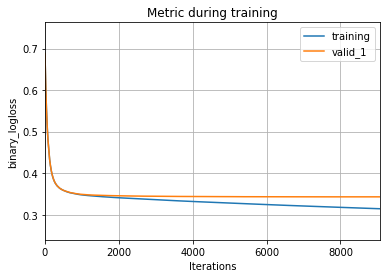

In [15]:
print('Plotting metrics recorded during training...')
ax = lgb.plot_metric(evals_result, metric='binary_logloss')
plt.show()

In [16]:
from  sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

folds = KFold(n_splits=5, shuffle=True, random_state=17)
oof_lgb = np.zeros(len(X))
predictions_lgb = np.zeros(len(test))

param = {'boosting_type':'gbdt',
         'objective' : 'binary', #
         'metric' : 'binary_logloss',
         'learning_rate' : 0.01,
         'max_depth' : 15,
         'feature_fraction':0.8,
         'bagging_fraction': 0.9,
         'bagging_freq': 8,
         'lambda_l1': 0.6,
         'lambda_l2': 0 }


for fold_, (trn_idx, val_idx) in enumerate(folds.split(X, y)):
    print("fold n°{}".format(fold_+1))
    trn_data = lgb.Dataset(X.iloc[trn_idx],  y.iloc[trn_idx])
    val_data = lgb.Dataset(X.iloc[val_idx],  y.iloc[val_idx])

    num_round = 10000
    clf = lgb.train(param, trn_data,
                    num_round, 
                    valid_sets = [trn_data, val_data], 
                    verbose_eval=200, 
                    early_stopping_rounds =500 )
    oof_lgb[val_idx] = clf.predict(X.iloc[val_idx], 
                                num_iteration=clf.best_iteration)

    predictions_lgb += clf.predict(test, 
                    num_iteration=clf.best_iteration) / folds.n_splits


fold n°1
Training until validation scores don't improve for 500 rounds
[200]	training's binary_logloss: 0.394668	valid_1's binary_logloss: 0.394704
[400]	training's binary_logloss: 0.363933	valid_1's binary_logloss: 0.364067
[600]	training's binary_logloss: 0.355363	valid_1's binary_logloss: 0.355735
[800]	training's binary_logloss: 0.350655	valid_1's binary_logloss: 0.351381
[1000]	training's binary_logloss: 0.347931	valid_1's binary_logloss: 0.349166
[1200]	training's binary_logloss: 0.34609	valid_1's binary_logloss: 0.347948
[1400]	training's binary_logloss: 0.344541	valid_1's binary_logloss: 0.347101
[1600]	training's binary_logloss: 0.343207	valid_1's binary_logloss: 0.346493
[1800]	training's binary_logloss: 0.341999	valid_1's binary_logloss: 0.346008
[2000]	training's binary_logloss: 0.340916	valid_1's binary_logloss: 0.34567
[2200]	training's binary_logloss: 0.339911	valid_1's binary_logloss: 0.345436
[2400]	training's binary_logloss: 0.338886	valid_1's binary_logloss: 0.345138

[2000]	training's binary_logloss: 0.341238	valid_1's binary_logloss: 0.343094
[2200]	training's binary_logloss: 0.340278	valid_1's binary_logloss: 0.34287
[2400]	training's binary_logloss: 0.339302	valid_1's binary_logloss: 0.342583
[2600]	training's binary_logloss: 0.338385	valid_1's binary_logloss: 0.342365
[2800]	training's binary_logloss: 0.337463	valid_1's binary_logloss: 0.342146
[3000]	training's binary_logloss: 0.336584	valid_1's binary_logloss: 0.341985
[3200]	training's binary_logloss: 0.335699	valid_1's binary_logloss: 0.341789
[3400]	training's binary_logloss: 0.334836	valid_1's binary_logloss: 0.341621
[3600]	training's binary_logloss: 0.334012	valid_1's binary_logloss: 0.341486
[3800]	training's binary_logloss: 0.333215	valid_1's binary_logloss: 0.341404
[4000]	training's binary_logloss: 0.332438	valid_1's binary_logloss: 0.34131
[4200]	training's binary_logloss: 0.331696	valid_1's binary_logloss: 0.341241
[4400]	training's binary_logloss: 0.330932	valid_1's binary_loglos

[5200]	training's binary_logloss: 0.326354	valid_1's binary_logloss: 0.347488
[5400]	training's binary_logloss: 0.325616	valid_1's binary_logloss: 0.347394
[5600]	training's binary_logloss: 0.324906	valid_1's binary_logloss: 0.347359
[5800]	training's binary_logloss: 0.324205	valid_1's binary_logloss: 0.347316
[6000]	training's binary_logloss: 0.323525	valid_1's binary_logloss: 0.347302
[6200]	training's binary_logloss: 0.322819	valid_1's binary_logloss: 0.347236
[6400]	training's binary_logloss: 0.322151	valid_1's binary_logloss: 0.347217
[6600]	training's binary_logloss: 0.321489	valid_1's binary_logloss: 0.347185
[6800]	training's binary_logloss: 0.320812	valid_1's binary_logloss: 0.347145
[7000]	training's binary_logloss: 0.3201	valid_1's binary_logloss: 0.34708
[7200]	training's binary_logloss: 0.31941	valid_1's binary_logloss: 0.34704
[7400]	training's binary_logloss: 0.318741	valid_1's binary_logloss: 0.347014
[7600]	training's binary_logloss: 0.318089	valid_1's binary_logloss: 

NameError: name 'a' is not defined

In [35]:
print("CV score: {:<8.8f}".format(mean_squared_error(oof_lgb, y)))

CV score: 0.10372482


In [26]:
SID_TRAIN = X['sid']
train_result = pd.DataFrame()
train_result['sid']= SID_TRAIN
train_result['label'] = oof_lgb
train_result.to_csv("train_lgb_result.csv" ,index =False )

In [27]:
y_hat =[]
for  y in oof_lgb:
    if y>0.5:
        y_hat.append( 1) 
    else :
        y_hat.append( 0 )
y_hat

[1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,


In [28]:
from sklearn.metrics import accuracy_score 
y = train['label'].values
accuracy_score( y, y_hat )

0.859088

In [29]:
type(predictions_lgb)

numpy.ndarray

In [37]:
test['label'] = predictions_lgb
test[['sid'  , 'label']].to_csv('submit_lgb_probility.csv' ,index =False )
test['label']  = test['label'] .map( lambda x : 1 if x>0.5 else 0 )
y_hat = test [['sid' ,'label']].sort_values(by ='sid')['label'].values

test_ans = pd.read_csv("../test1_ans.csv")
y_true = test_ans.sort_values(by ='sid')['label'].values
accuracy_score( y_true , y_hat )

test[['sid'  , 'label']].to_csv('submit_lgb.csv',index =False )

In [31]:
y_hat

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [32]:
y_true

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [33]:
predictions_lgb

array([0.18563422, 0.65512572, 0.07757384, ..., 0.86271128, 0.95875047,
       0.95065823])